In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_training_set.csv
/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_test_set_processed_8bit.csv
/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_training_set_processed_8bit.csv
/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_description.txt
/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_test_set.csv


In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 8.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 65.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 74.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 83.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 27.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 71.2 

In [3]:
df_train = pd.read_csv('/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_training_set.csv', na_values='na')
df_test = pd.read_csv('/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_test_set.csv', na_values='na')

In [4]:
df_train

/usr/local/lib/python3.10/site-packages/IPython/core/formatters.py:347: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [5]:
df_test

/usr/local/lib/python3.10/site-packages/IPython/core/formatters.py:347: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [6]:
# Replace the target variable "class" values from "pos"/"neg" to 1/0 for classification
df_train['class'] = df_train['class'].map({'pos': 1, 'neg': 0})
df_test['class'] = df_test['class'].map({'pos': 1, 'neg': 0})

In [7]:
from pycaret.classification import *

In [8]:
clf_setup = setup(data=df_train, 
                  target='class', 
                  session_id=123,  
                  train_size=0.9,  
                  normalize=True,  
                  remove_multicollinearity=True,  
                  multicollinearity_threshold=0.9, 
                  verbose=True)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(60000, 171)"
4,Transformed data shape,"(60000, 129)"
5,Transformed train set shape,"(54000, 129)"
6,Transformed test set shape,"(6000, 129)"
7,Numeric features,170
8,Rows with missing values,99.0%
9,Preprocess,True


In [9]:
best_model = compare_models()

# Tune the best-performing model
tuned_model = tune_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9936,0.9877,0.6844,0.9136,0.7820,0.7789,0.7875,1.6690
lightgbm,Light Gradient Boosting Machine,0.9933,0.9900,0.7278,0.8521,0.7843,0.7809,0.7838,335.6500
et,Extra Trees Classifier,0.9929,0.9878,0.6533,0.8938,0.7546,0.7511,0.7607,0.7390
gbc,Gradient Boosting Classifier,0.9921,0.9871,0.6711,0.8256,0.7396,0.7357,0.7401,12.1670
lr,Logistic Regression,0.9902,0.9726,0.5878,0.7705,0.6658,0.6609,0.6677,1.0260
ada,Ada Boost Classifier,0.9900,0.9867,0.6367,0.7318,0.6805,0.6755,0.6774,2.8610
knn,K Neighbors Classifier,0.9898,0.9075,0.5022,0.8180,0.6216,0.6167,0.6360,1.3400
dt,Decision Tree Classifier,0.9897,0.8442,0.6944,0.6905,0.6912,0.6860,0.6866,1.9690
lda,Linear Discriminant Analysis,0.9894,0.9758,0.6867,0.6816,0.6834,0.6780,0.6784,0.7020
svm,SVM - Linear Kernel,0.9892,0.9726,0.5567,0.7289,0.6305,0.6251,0.6313,1.2710


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9885,0.9646,0.4778,0.7414,0.5811,0.5755,0.5899
1,0.9883,0.9816,0.5000,0.7143,0.5882,0.5825,0.5921
2,0.9885,0.9493,0.4556,0.7593,0.5694,0.5640,0.5830
3,0.9883,0.9651,0.4667,0.7368,0.5714,0.5658,0.5810
4,0.9906,0.9772,0.4889,0.8980,0.6331,0.6287,0.6588
5,0.9880,0.9631,0.4444,0.7273,0.5517,0.5460,0.5631
6,0.9894,0.9720,0.4222,0.8837,0.5714,0.5668,0.6068
7,0.9900,0.9800,0.4778,0.8600,0.6143,0.6096,0.6368
8,0.9906,0.9875,0.5444,0.8305,0.6577,0.6531,0.6682


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_model = tune_model(best_model)

# Evaluate the tuned model
evaluate_model(tuned_model)

# Finalize the model for use on unseen data
final_model = finalize_model(tuned_model)

# Predict on the test set
predictions = predict_model(final_model, data=df_test)

# Save the model
save_model(final_model, 'aps_failure_model')

# Display the first few predictions
print(predictions.head())

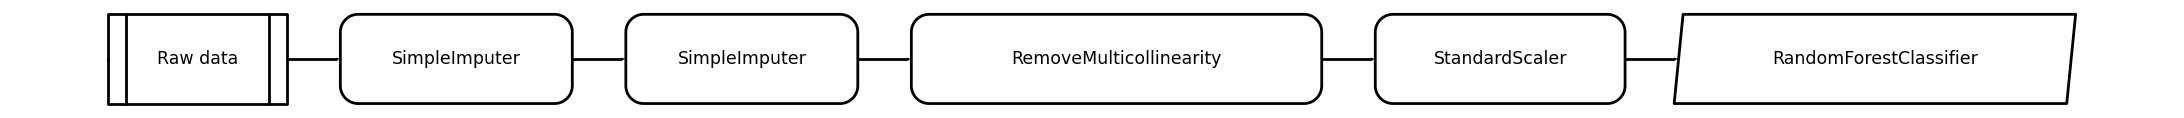

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
evaluate_model(tuned_model)

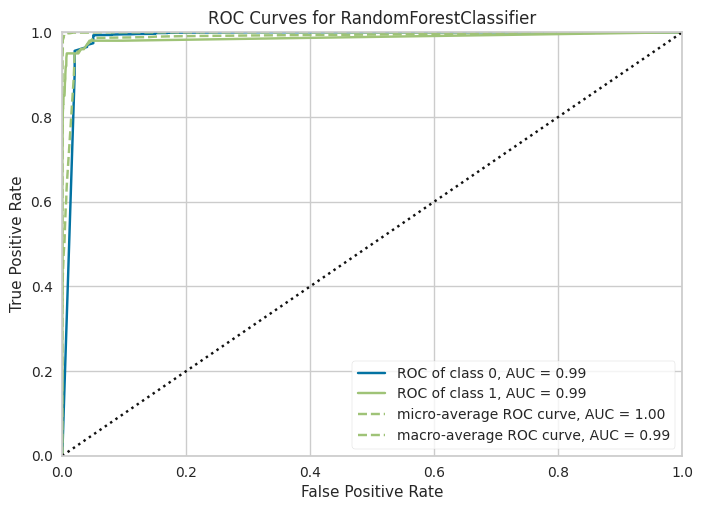

In [25]:
plot_model(tuned_model, plot = 'auc')

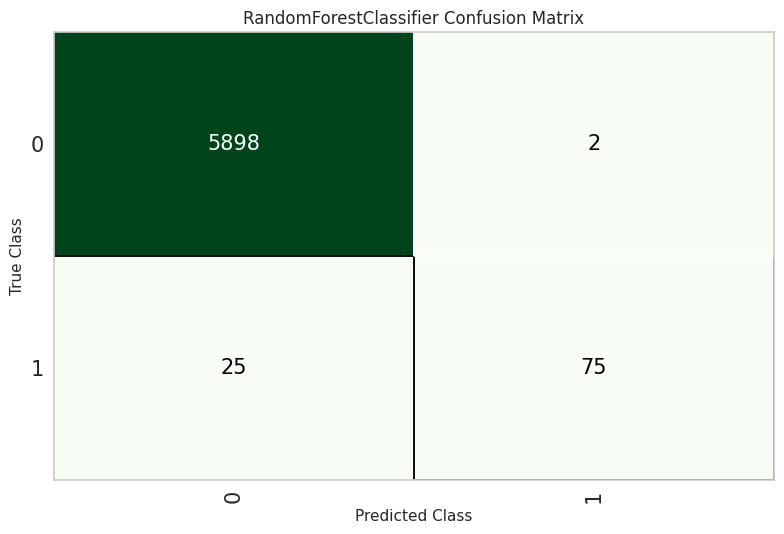

In [27]:

plot_model(tuned_model, plot = 'confusion_matrix')

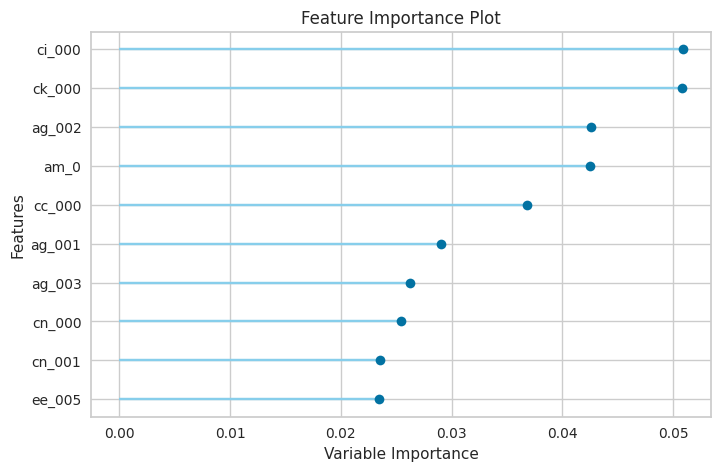

In [28]:
plot_model(tuned_model, plot = 'feature')

In [16]:
final_model = finalize_model(tuned_model)

# Predict on the test set
predictions = predict_model(final_model, data=df_test)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9918,0.9931,0.6907,0.9453,0.7982,0.7941,0.8043


In [17]:
# Display the first few predictions
print(predictions.head())

   aa_000  ab_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  ag_002  \
0      60     0.0    20.0    12.0     0.0     0.0     0.0     0.0     0.0   
1      82     0.0    68.0    40.0     0.0     0.0     0.0     0.0     0.0   
2   66002     2.0   212.0   112.0     0.0     0.0     0.0     0.0     0.0   
3   59816     NaN  1010.0   936.0     0.0     0.0     0.0     0.0     0.0   
4    1814     NaN   156.0   140.0     0.0     0.0     0.0     0.0     0.0   

     ag_003  ...    ee_005     ee_006    ee_007    ee_008  ee_009  ef_000  \
0    2682.0  ...     654.0       78.0      88.0       0.0     0.0     0.0   
1       0.0  ...     116.0       86.0     462.0       0.0     0.0     0.0   
2  199486.0  ...  269556.0  1315022.0  153680.0     516.0     0.0     0.0   
3       0.0  ...  485332.0   431376.0  210074.0  281662.0  3232.0     0.0   
4       0.0  ...   49782.0     3176.0     482.0      76.0     0.0     0.0   

   eg_000  class  prediction_label  prediction_score  
0     0.0      0   

In [18]:
save_model(final_model, 'aps_failure_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['aa_000', 'ab_000', 'ac_000',
                                              'ad_000', 'ae_000', 'af_000',
                                              'ag_000', 'ag_001', 'ag_002',
                                              'ag_003', 'ag_004', 'ag_005',
                                              'ag_006', 'ag_007', 'ag_008',
                                              'ag_009', 'ah_000', 'ai_000',
                                              'aj_000', 'ak_000', 'al_000',
                                              'am_0', 'an_000', 'ao_000',
                                              'ap_000', 'aq_000', 'ar_000',
                                              'a...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, crit